# Data Study Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* outputs/datasets/collection/HousePrices.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App.
* Creating plots to see correlation for the selected variables.






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing'

---

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/cleaned/HousePricesCleaned.csv"))
df.head(20)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,706,150,548,2003.0,1710,8450,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,978,284,460,1976.0,1262,9600,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,486,434,608,2001.0,1786,11250,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,216,540,642,1998.0,1717,9550,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,655,490,836,2000.0,2198,14260,350.0,84,5,8,1145,2000,2000,250000
5,796,566.0,1.0,732,64,480,1993.0,1362,14115,0.0,30,5,5,796,1993,1995,143000
6,1694,0.0,3.0,1369,317,636,2004.0,1694,10084,186.0,57,5,8,1686,2004,2005,307000
7,1107,983.0,3.0,859,216,484,1973.0,2090,10382,240.0,204,6,7,1107,1973,1973,200000
8,1022,752.0,2.0,0,952,468,1931.0,1774,6120,0.0,0,5,7,952,1931,1950,129900
9,1077,0.0,2.0,851,140,205,1939.0,1077,7420,0.0,4,6,5,991,1939,1950,118000


# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [5]:
from ydata_profiling import ProfileReport
ydata_report = ProfileReport(df=df, minimal=True)
ydata_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Create a new directory to save plots

In [6]:
import os

try:
  os.makedirs("docs/plots")
except Exception as e:
  print(e)

# Correlation Study

In [7]:
import numpy as np
import ppscore as pps
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline


def heatmap_corr(df,threshold, figsize=(20,12), font_annot = 8):
  """
  Function to create heatmap using correlations.
  """
  if len(df.columns) > 1:
    mask = np.zeros_like(df, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(df) < threshold] = True

    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                linewidth=0.5
                     )
    axes.set_yticklabels(df.columns, rotation = 0)
    plt.ylim(len(df.columns),0)
    if df.name == "corr_spearman":
      plt.savefig(f'docs/plots/heatmap_corr_spearman.png', bbox_inches='tight')
    else:
      plt.savefig(f'docs/plots/heatmap_corr_pearson.png', bbox_inches='tight')
    plt.show()


def heatmap_pps(df,threshold, figsize=(20,12), font_annot = 8):
    """
    Function to create heatmap using pps.
    """
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, xticklabels=True,yticklabels=True,
                       mask=mask,cmap='rocket_r', annot_kws={"size": font_annot},
                       linewidth=0.05,linecolor='grey')
      
      plt.ylim(len(df.columns),0)
      plt.savefig(f'docs/plots/heatmap_pps.png', bbox_inches='tight')
      plt.show()


def CalculateCorrAndPPS(df):
  """
  Function to calculate correlations and pps.
  """
  df_corr_spearman = df.corr(method="spearman")
  df_corr_spearman.name = 'corr_spearman'
  df_corr_pearson = df.corr(method="pearson")
  df_corr_pearson.name = 'corr_pearson'

  pps_matrix_raw = pps.matrix(df)
  pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

  pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
  print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
  print(pps_score_stats.round(3))

  return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix,CorrThreshold,PPS_Threshold,
                      figsize=(20,12), font_annot=8 ):
  """
  Function to display the correlations and pps.
  """

  print("\n")
  print("* Analyze how the target variable for your ML models are correlated with other variables (features and target)")
  print("* Analyze multi-colinearity, that is, how the features are correlated among themselves")

  print("\n")
  print("*** Heatmap: Spearman Correlation ***")
  print("It evaluates monotonic relationship \n")
  heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Pearson Correlation ***")
  print("It evaluates the linear relationship between two continuous variables \n")
  heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Power Predictive Score (PPS) ***")
  print(f"PPS detects linear or non-linear relationships between two columns.\n"
        f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
  heatmap_pps(df=pps_matrix,threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

Check the PPS threshold for PPS score IQR to decide threshold for heatmap, also supress FutureWarnings.

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  272.0  0.046  0.102  0.0  0.0  0.0  0.035  0.628




* Analyze how the target variable for your ML models are correlated with other variables (features and target)
* Analyze multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



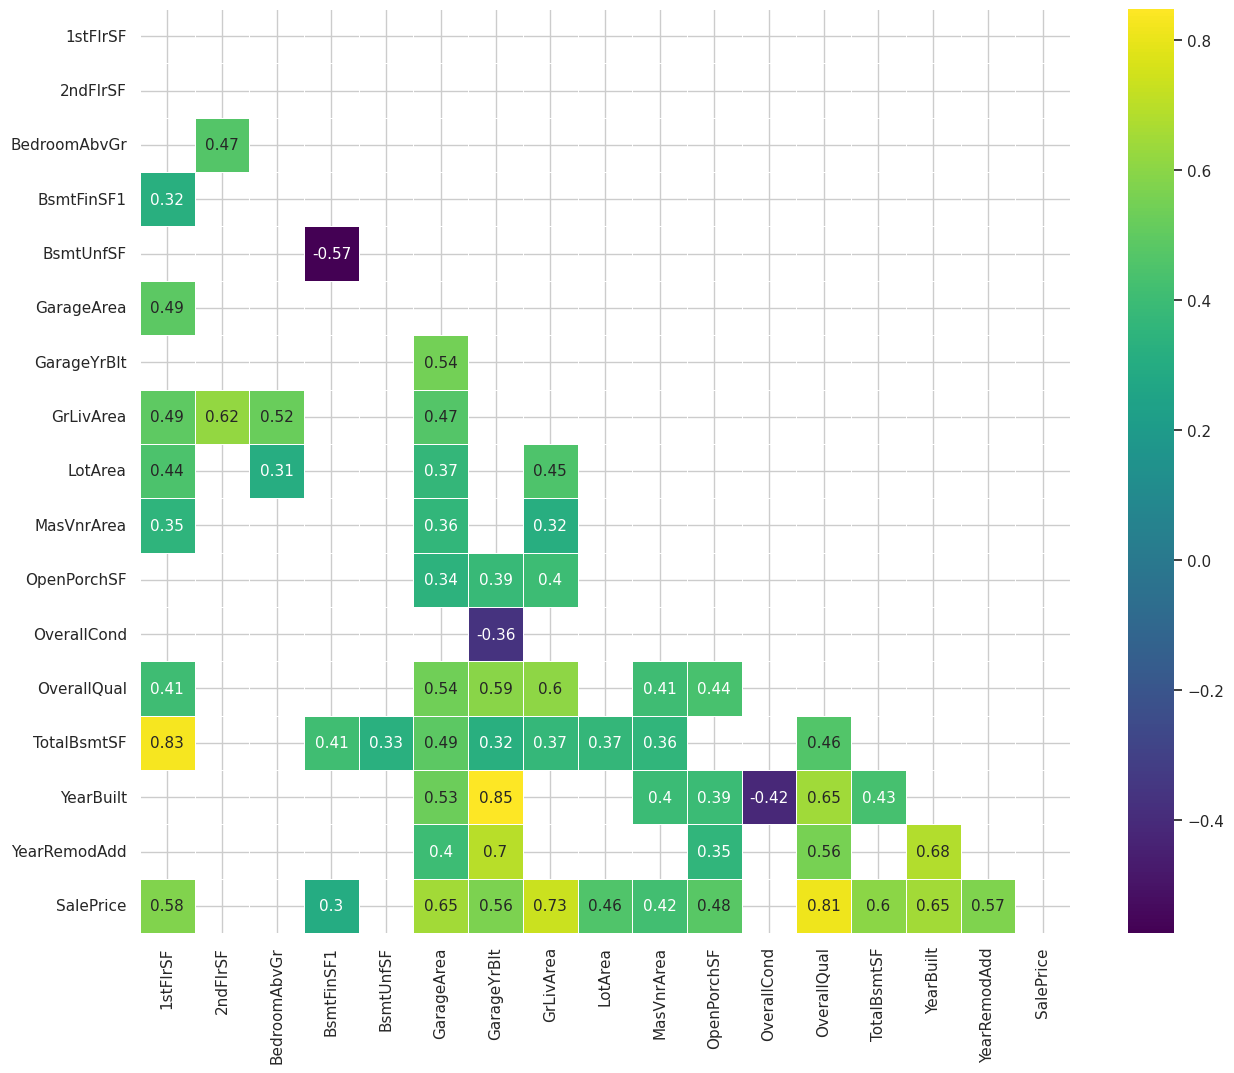



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



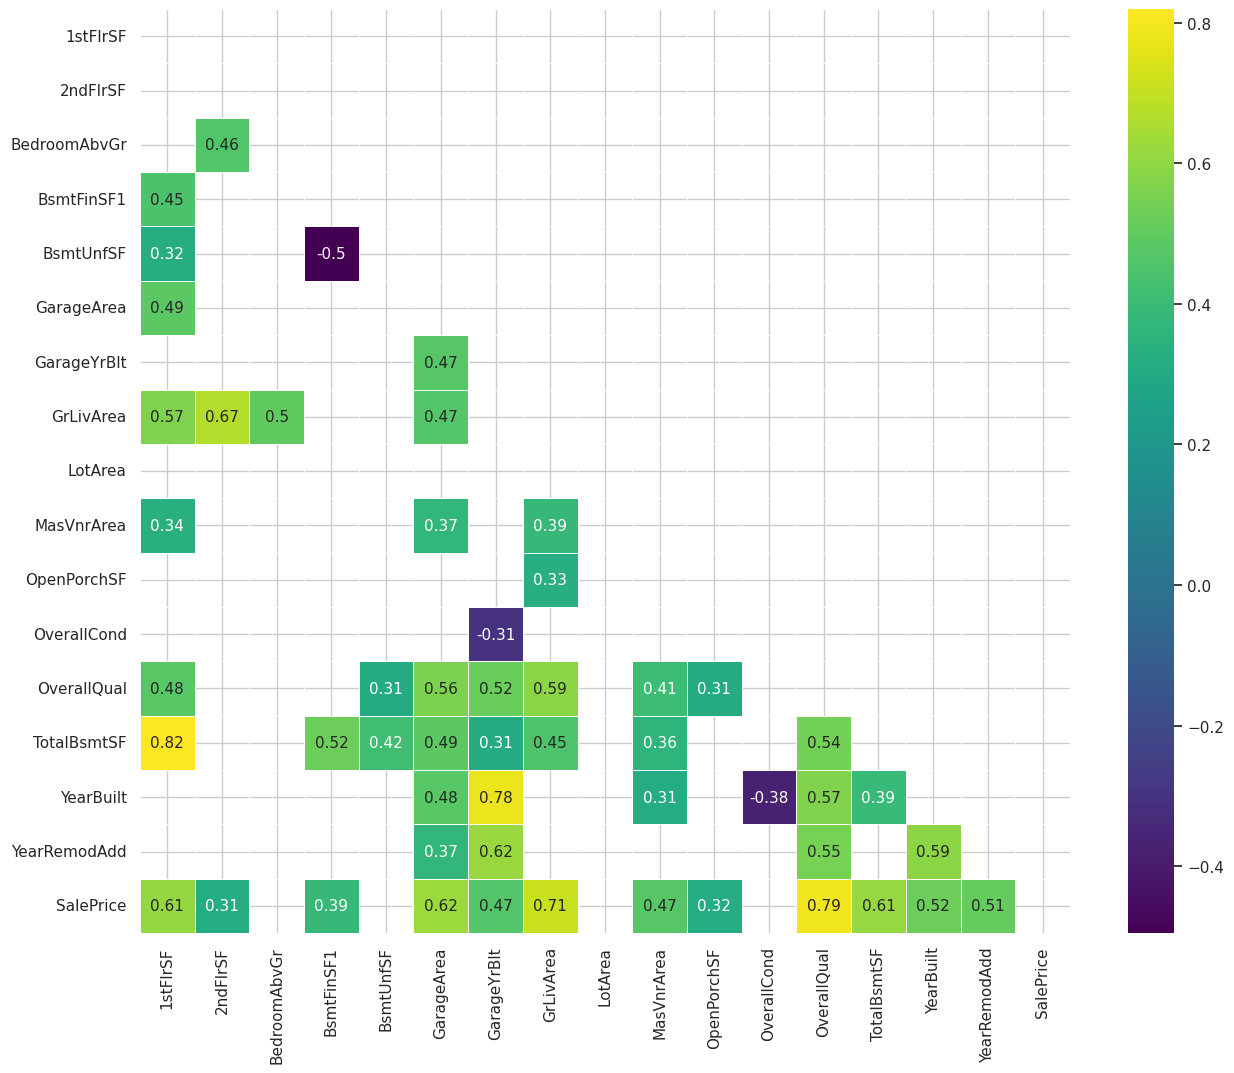



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



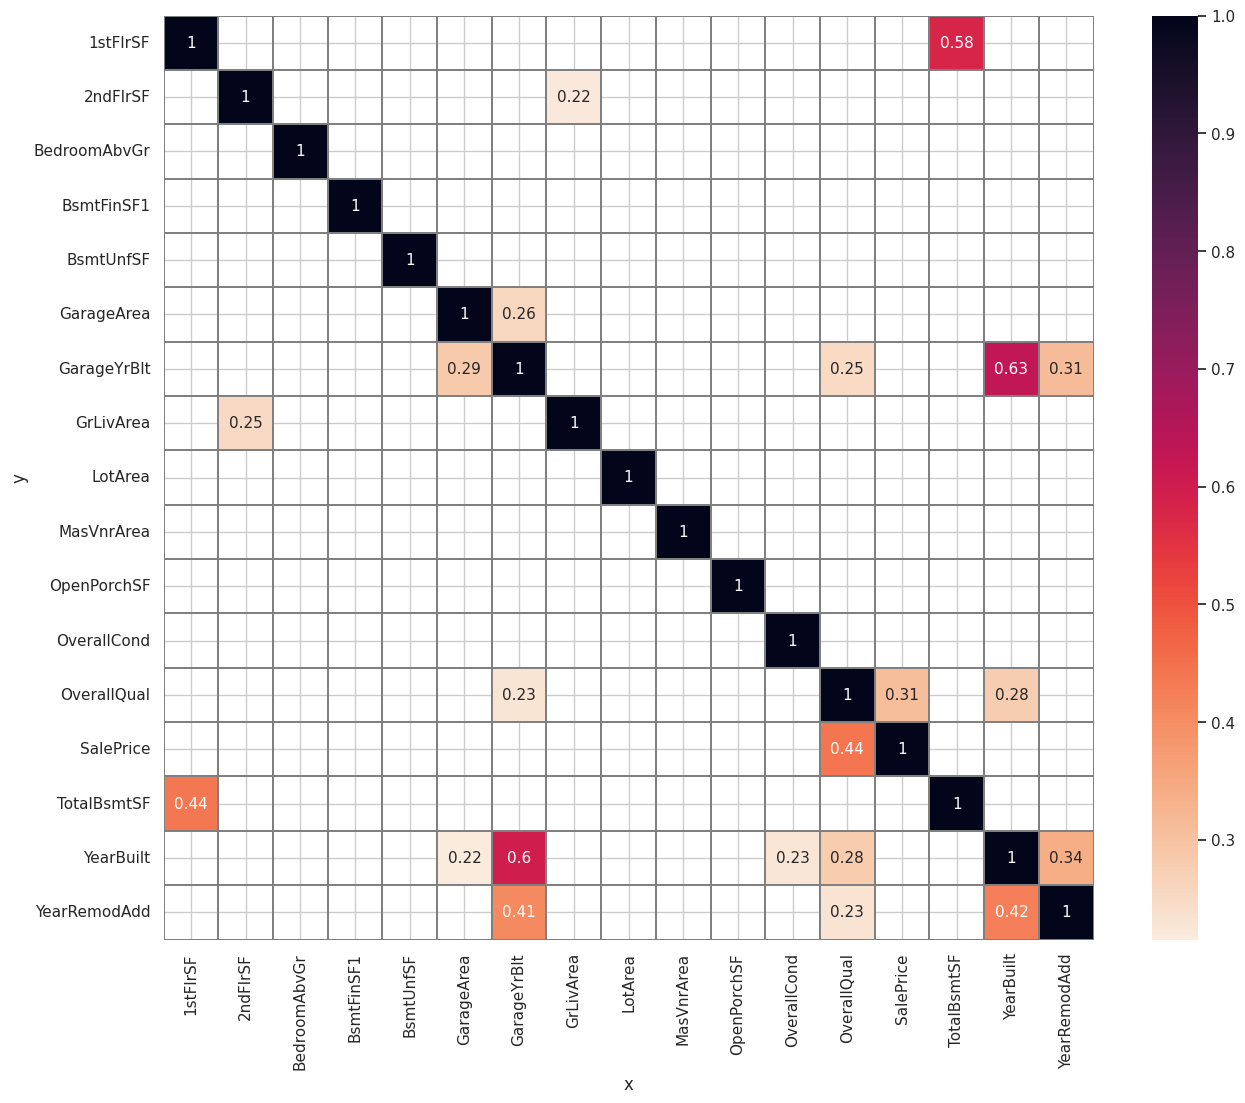

In [9]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.3, PPS_Threshold =0.2,
                  figsize=(15,12), font_annot=11)

We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations


In [10]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
GarageYrBlt     0.564694
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

We do the same for `pearson`

In [11]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.469056
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

We can see that spearman gives a higher correlation than pearson in general and that a few variables is different, for example is OpenPorchSF not in the top 10 in pearson and MasVnrBlt not in spearman..


Here will we check the top 10 correleation for pearson and spearman combined, which in reality will be more than 10 variables.

In [12]:
top_n = 10
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'BsmtFinSF1',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

Therefore we are studying at df the following variables. We will investigate:
* The top 10 values from pearson and spearman (12) and name it vars_to_study

In [13]:
vars_to_study = ['1stFlrSF', 'BsmtFinSF1', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'MasVnrArea', 'OpenPorchSF', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
vars_to_study

['1stFlrSF',
 'BsmtFinSF1',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

# EDA on selected variables

In [14]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(10)

,1stFlrSF,BsmtFinSF1,GarageArea,GarageYrBlt,GrLivArea,LotArea,MasVnrArea,OpenPorchSF,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,706,548,2003.0,1710,8450,196.0,61,7,856,2003,2003,208500
1,1262,978,460,1976.0,1262,9600,0.0,0,6,1262,1976,1976,181500
2,920,486,608,2001.0,1786,11250,162.0,42,7,920,2001,2002,223500
3,961,216,642,1998.0,1717,9550,0.0,35,7,756,1915,1970,140000
4,1145,655,836,2000.0,2198,14260,350.0,84,8,1145,2000,2000,250000
5,796,732,480,1993.0,1362,14115,0.0,30,5,796,1993,1995,143000
6,1694,1369,636,2004.0,1694,10084,186.0,57,8,1686,2004,2005,307000
7,1107,859,484,1973.0,2090,10382,240.0,204,7,1107,1973,1973,200000
8,1022,0,468,1931.0,1774,6120,0.0,0,7,952,1931,1950,129900
9,1077,851,205,1939.0,1077,7420,0.0,4,5,991,1939,1950,118000


## Variables Distribution by SalesPrice

We plot the distribution (numerical and categorical) coloured by SalesPrice

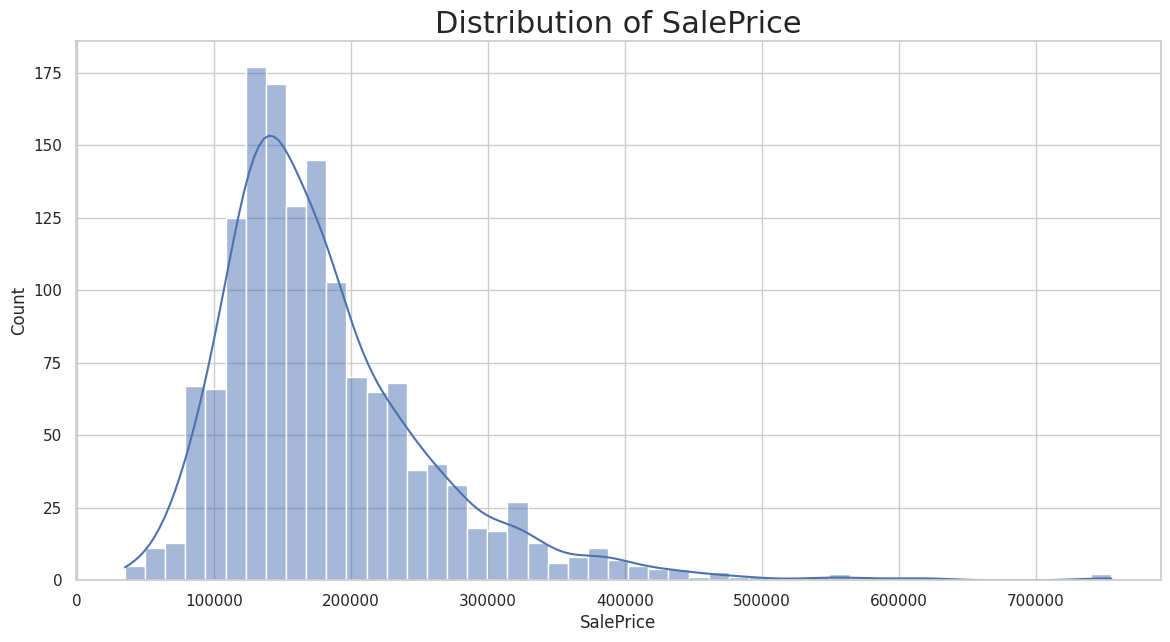

In [15]:
sns.set_theme(style='whitegrid')
target_var = 'SalePrice'

def plot_target_hist(df, target_var):
  """
  Function to create histogram of the values of target.
  Save histogram into docs/plots for use in dashboard
  """
  plt.figure(figsize=(14, 7))
  sns.histplot(data=df, x=target_var, kde=True)
  plt.title(f"Distribution of {target_var}", fontsize=22)
  plt.savefig(f'docs/plots/hist_plot_{target_var}.png', bbox_inches='tight')        
  plt.show()

plot_target_hist(df, target_var)

<Figure size 1400x500 with 0 Axes>

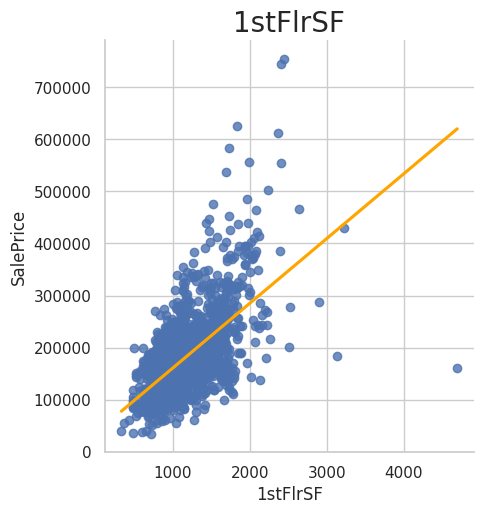

<Figure size 1400x500 with 0 Axes>

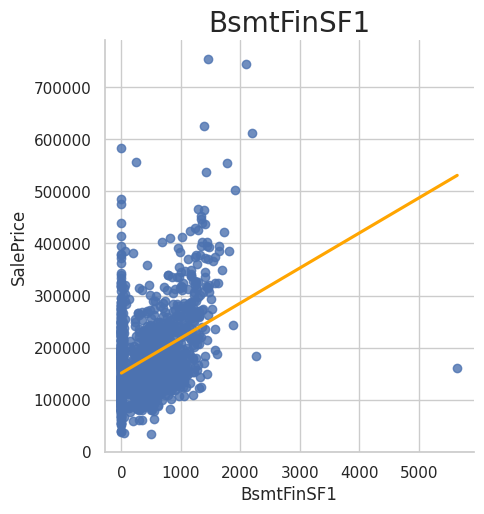

<Figure size 1400x500 with 0 Axes>

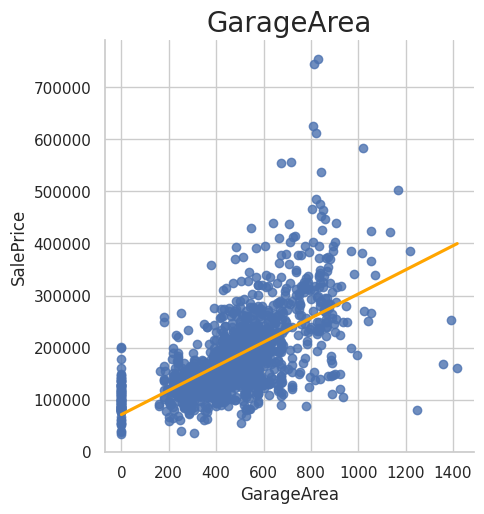

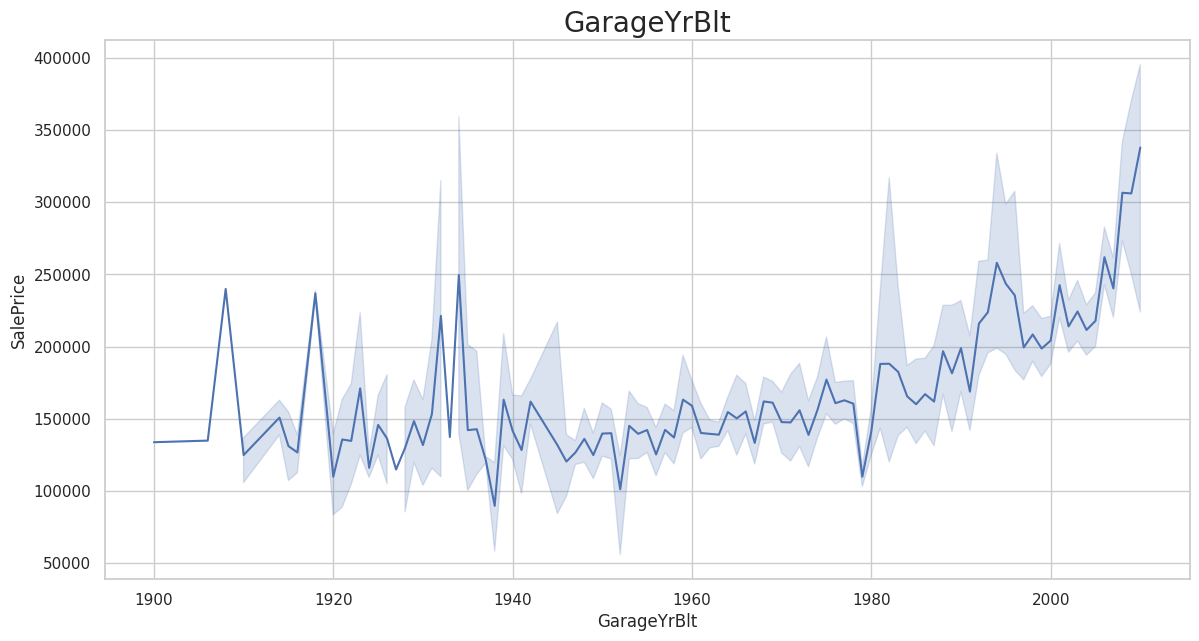

<Figure size 1400x500 with 0 Axes>

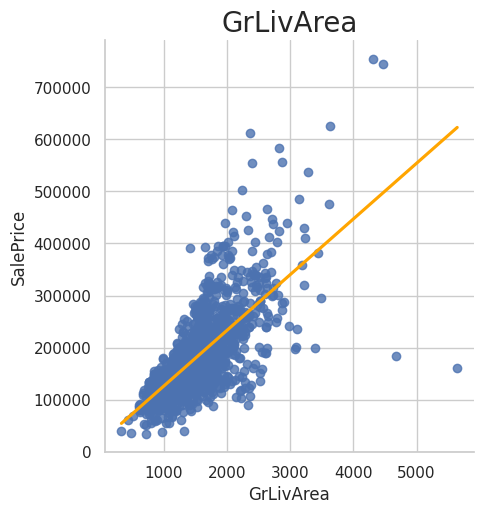

<Figure size 1400x500 with 0 Axes>

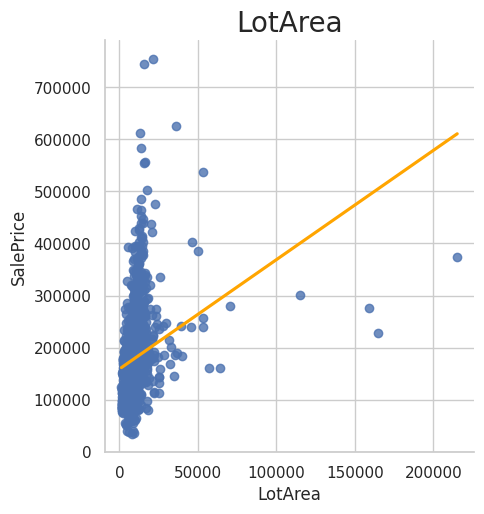

<Figure size 1400x500 with 0 Axes>

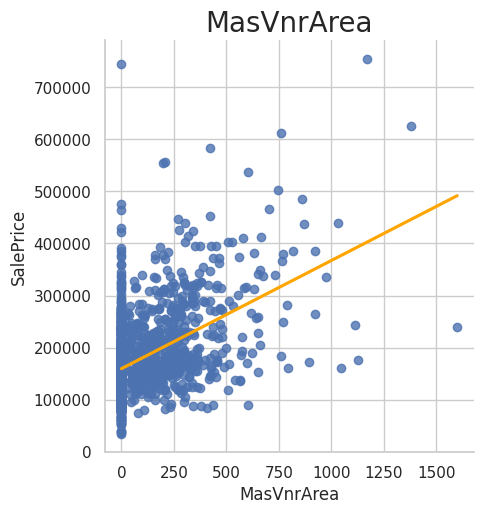

<Figure size 1400x500 with 0 Axes>

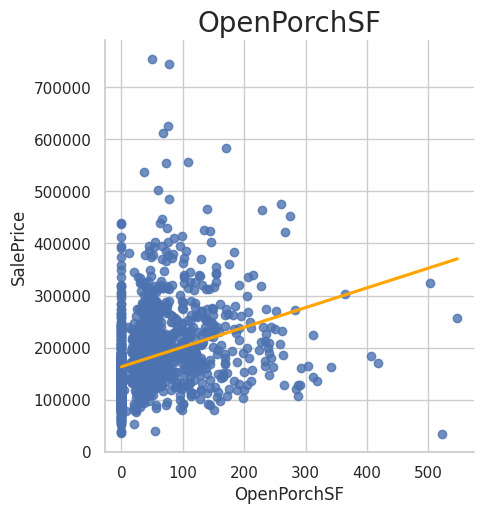

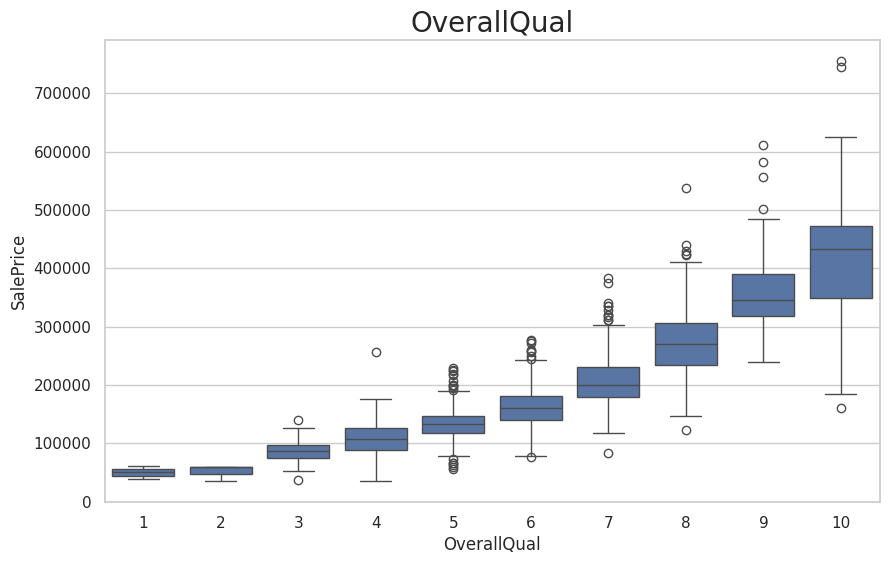

<Figure size 1400x500 with 0 Axes>

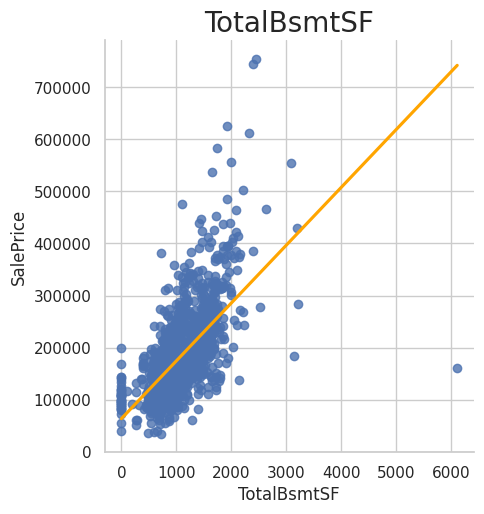

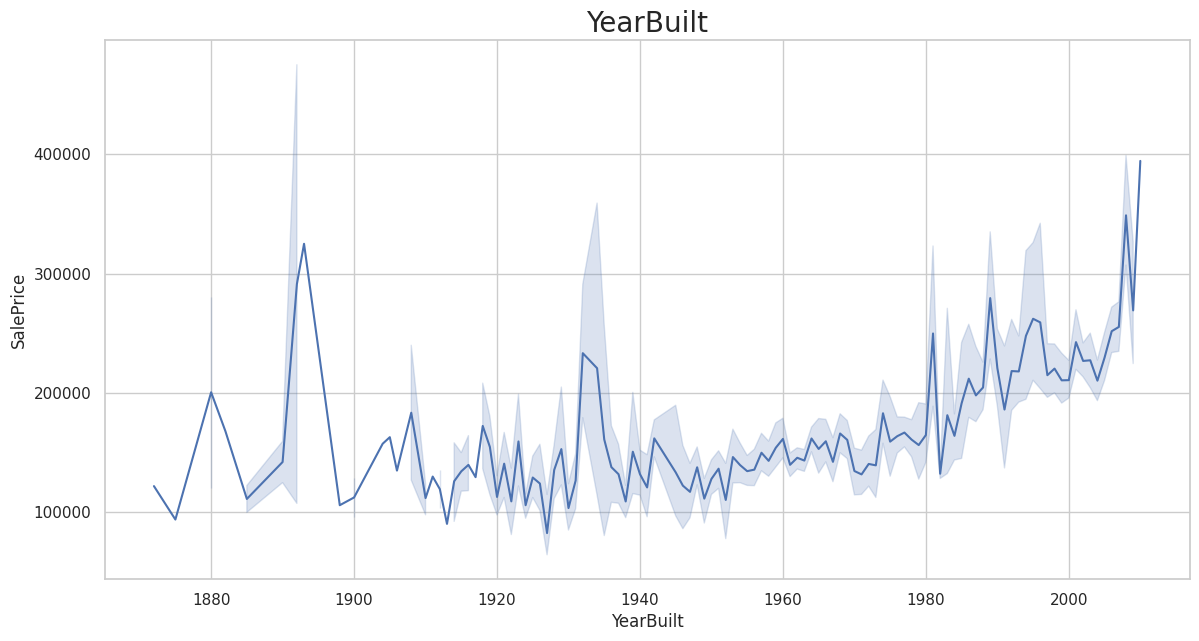

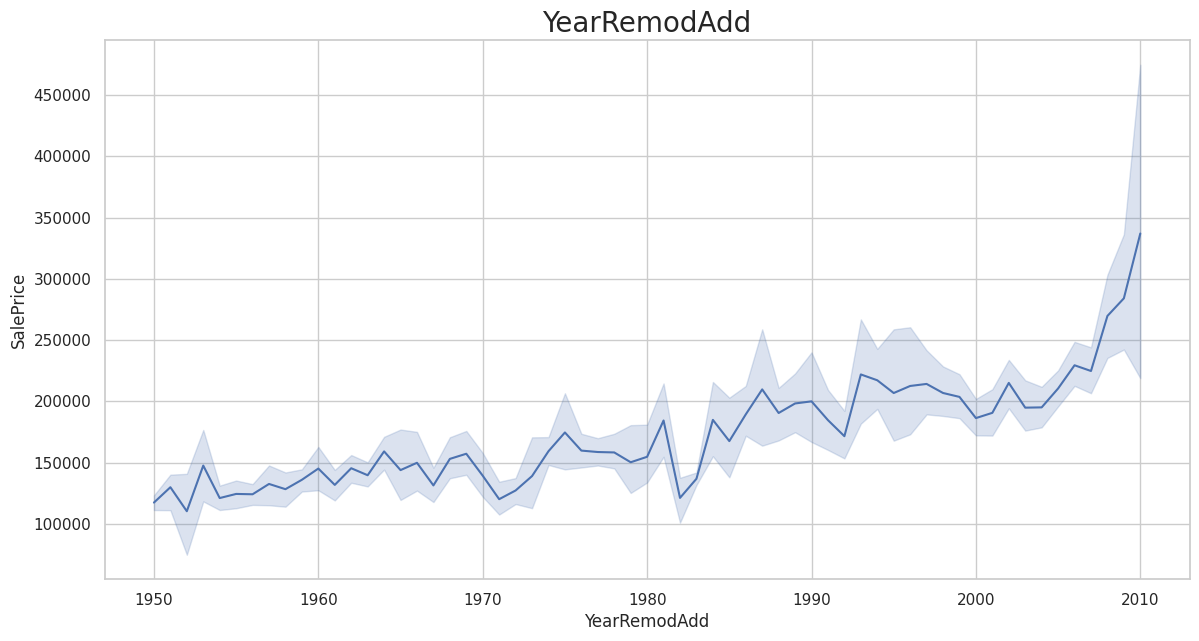

In [17]:
time = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

def plot_lm(df, col, target_var):
  """
  Function to create linear regression plots of the target and
  features with continuous values.
  Figures created saved to folder docs/plots
  """
  plt.figure(figsize=(14, 5))
  sns.lmplot(data=df, x=col, y=target_var, ci=None, line_kws={'color': 'orange'})
  plt.title(f"{col}", fontsize=20)
  plt.savefig(f'docs/plots/lm_plot_price_by_{col}.png', bbox_inches='tight')        
  plt.show()

def plot_line(df, col, target_var):
  """
  Function creates a line plot of the target and time variables.
  Figures created saved to folder docs/plots
  """
  plt.figure(figsize=(14, 7))
  sns.lineplot(data=df, x=col, y=target_var)
  plt.title(f"{col}", fontsize=20)
  plt.savefig(f'docs/plots/line_plot_price_by_{col}.png', bbox_inches='tight')        
  plt.show()

def plot_box(df, col, target_var):
  """
  Function creates a box plot of the target versus categorical variables.
  Figures created saved to folder docs/plots
  """
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=df, x=col, y=target_var) 
  plt.title(f"{col}", fontsize=20)
  plt.savefig(f'docs/plots/box_plot_price_by_{col}', bbox_inches='tight')
  plt.show()


for col in vars_to_study:
  if len(df_eda[col].unique()) <= 12:
    plot_box(df_eda, col, target_var)
    print("\n\n")
  else:
    if col in time:
      plot_line(df_eda, col, target_var)
      print("\n\n")
    else:
      plot_lm(df_eda, col, target_var)
      print("\n\n")

---

# Conclusions and Next steps

The correlations and plots interpretation converge. 
* The year built and year garage built is affecting the salesprice decently little before 1980 while it does it a lot after 1980, the later the bigger.
* Every variable has outliers.
* There is bigger correlation in general for sizes than other variables.

---

Next notebook we will look at the Feature Engineering